### [ Scatter(산점도) Plot 살펴보기 ]
- 용도 : 2개 이상의 컬럼들의 관계 정도를 시각화하는 그래프
- corr()

(1) 모듈 로딩

In [532]:
import pandas as pd
import numpy as np

In [533]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
df = pd.DataFrame([(.2, .3), (.0, .6), (.6, .0), (.2, .1)],
                  columns=['dogs', 'cats'])
df

,dogs,cats
0,0.2,0.3
1,0.0,0.6
2,0.6,0.0
3,0.2,0.1


In [534]:
df.corr(method=histogram_intersection)

,dogs,cats
dogs,1.0,0.3
cats,0.3,1.0


In [535]:
df.corr()          # 개와 고양이는 음의 상관관계에 있다.

,dogs,cats
dogs,1.000000,-0.851064
cats,-0.851064,1.000000


In [536]:
df = pd.DataFrame([(1, 1), (2, np.nan), (np.nan, 3), (4, 4)],
                  columns=['dogs', 'cats'])
df

,dogs,cats
0,1.0,1.0
1,2.0,NaN
2,NaN,3.0
3,4.0,4.0


In [537]:
df.corr(numeric_only = True, min_periods=2)

,dogs,cats
dogs,1.0,1.0
cats,1.0,1.0


In [538]:
df.corr(numeric_only = True, min_periods=3)

,dogs,cats
dogs,1.0,NaN
cats,NaN,1.0


(2) 데이터 준비

In [539]:
file = '../DATA/auto-mpg.csv'

(3) 데이터 저장 => CSV ---> DataFrame

* 컬럼 데이터 정보
- mpg: continuous
- cylinders: multi-valued discrete
- displacement: continuous
- horsepower: continuous
- weight: continuous
- acceleration: continuous
- model year: multi-valued discrete
- origin: multi-valued discrete
- car name: string (unique for each instance)

In [540]:
mpgDF = pd.read_csv(file, sep='\s+', names = ['mpg', 'cylinder', 'displacement', 'horsepower', 'weight',
                                                'acceleration', 'model year', 'origin', 'car name' ])

In [541]:
mpgDF.head()

,mpg,cylinder,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


(4) 데이터 정보 확인

- 전체 데이터 간략 정보 확인

In [542]:
mpgDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinder      398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


- 실제 데이터의 값의 종류 즉, 고유값 확인 => unique() / nunique()
    * 각 컬럼의 이상한 값 즉, 이상치 확인
    * 각 컬럼의 값의 종류 및 범위
    * 각 컬럼의 실제 데이터 타입

In [543]:
for col in mpgDF.columns:
    print(f'[{col}] ======================')
    print(mpgDF[col].unique(), mpgDF[col].nunique(), sep = '\n', end = '\n\n')

[mpg] ======================
[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]
129

[cylinder] ======================
[8 4 6 3 5]
5

[displacement] ======================
[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   

In [544]:
# dropna 파라미터 설정으로 컬럼의 결측치 데이터 수까지 확인 가능
mpgDF['origin'].nunique(dropna = False), mpgDF['origin'].unique()   #저렇게 dropna 하면 결측값도 포함시켜서 카운트

(3, array([1, 3, 2], dtype=int64))

(5) 데이터 전처리
- 결측치 체크 => 꼭 NaN이 아닐 수 있음
- 이상치 체크 => 정말 컬럼의 범위를 벗어난 값, 잘못 입력된 값
- 중복값 체크
- 데이터 표준화 => 자료형, 데이터 단위 일치
- 데이터 정규화 => 데이터의 크기 일치

(5-1) 결측치 체크 및 처리 ==> 이상한 값 즉 이상치 NaN으로 변환 후 처리

In [545]:
mpgDF.horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [546]:
mpgDF.horsepower.value_counts()['?']        #시리즈에서 물음표만 뽑아냄

6

In [547]:
mpgDF.horsepower.replace('?', np.nan, inplace = True)

In [548]:
mpgDF.isnull().sum()

mpg             0
cylinder        0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [549]:
mpgDF.dropna(inplace = True)

In [550]:
mpgDF.isnull().sum()

mpg             0
cylinder        0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

(5-2) 데이터 표준화 => horsepower의 자료형을 실제 데이터와 일치

In [551]:
mpgDF.horsepower = mpgDF.horsepower.astype('float32')
mpgDF.dtypes

mpg             float64
cylinder          int64
displacement    float64
horsepower      float32
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

(5-3) 데이터 표준화 => 연속형 즉 수치 자료형 ------> 범주형 자료형 변환
- 46~230 범위 실수 수치갑 ==> 저출력/중출력/고출력

In [552]:
mpgDF.horsepower.describe()

count    392.000000
mean     104.469391
std       38.491138
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [553]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3)

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

In [554]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3, include_lowest = True)

[(0.993, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.993, 3.0]]
Categories (3, interval[float64, right]): [(0.993, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

In [555]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3, labels = [ 'A', 'B', 'C'])

['A', 'C', 'B', 'B', 'C', 'A']
Categories (3, object): ['A' < 'B' < 'C']

In [556]:
#out, ret = pd.cut(mpgDF.horsepower, bins = 3, labels = ['저마력', '중마력', '고마력'], retbins = True)
#retbins 통해서 범위값을 확인가능 

In [557]:
out,ret = pd.cut(mpgDF.horsepower, bins=3, labels=['저마력','중마력','고마력'], retbins=True) # 읽어들인 데이터를 가지고 분석
# out, ret이 나온다(ret은 구간 정보)       #retbins 통해서 범위값을 확인가능
print(out, ret, sep = '\n\n')

0      중마력
1      중마력
2      중마력
3      중마력
4      중마력
      ... 
393    저마력
394    저마력
395    저마력
396    저마력
397    저마력
Name: horsepower, Length: 392, dtype: category
Categories (3, object): ['저마력' < '중마력' < '고마력']

[ 45.816      107.33333333 168.66666667 230.        ]


In [558]:
mpgDF.horsepower = out
mpgDF.dtypes

mpg              float64
cylinder           int64
displacement     float64
horsepower      category
weight           float64
acceleration     float64
model year         int64
origin             int64
car name          object
dtype: object

mpgDF['horsepower'] = out
mpgDF.dtypes

In [559]:
s = pd.Series(list('abca'))
s

0    a
1    b
2    c
3    a
dtype: object

In [560]:
mpgDF.dtypes

mpg              float64
cylinder           int64
displacement     float64
horsepower      category
weight           float64
acceleration     float64
model year         int64
origin             int64
car name          object
dtype: object

In [561]:
pd.get_dummies(s)

,a,b,c
0,True,False,False
1,False,True,False
2,False,False,True
3,True,False,False


(5-3) 데이터 표준화 => 범주형 ==> 연속형/수치화 변환 : One-Hot-Encoding 방식

In [562]:
# pandas.get_dummies() 함수
# mpgDF에 origin컬럼을 변환 ===> 1,2,3 범주형

In [563]:
s = mpgDF.origin
#pd.get_dummies(mpgDF.origin)
pd.get_dummies(s, dtype="int32")

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
393,1,0,0
394,0,1,0
395,1,0,0
396,1,0,0


In [564]:
# pandas.get_dummies() 함수
# mpgDF에 origin컬럼을 변환 ===> 'USA', 'EU', 'JPN' 변환

In [565]:
mpgDF['origin'].replace({1: 'USA', 2:'EU', 3:'JPN'}, inplace = True)

In [566]:
mpgDF['origin'] = mpgDF['origin'].astype('category')

In [567]:
mpgDF.dtypes

mpg              float64
cylinder           int64
displacement     float64
horsepower      category
weight           float64
acceleration     float64
model year         int64
origin          category
car name          object
dtype: object

(6) 데이터 분석    
(6-1) 연비 msg 컬럼과 관계가 가장 높은 컬럼

In [568]:
# 상관계수 수치화 확인 ----------------------------------------------------
corrDF = mpgDF.corr(numeric_only = True)
corrDF['mpg'][1:]

cylinder       -0.777618
displacement   -0.805127
weight         -0.832244
acceleration    0.423329
model year      0.580541
Name: mpg, dtype: float64

In [569]:
corrDF['mpg'][1:].sort_values()

weight         -0.832244
displacement   -0.805127
cylinder       -0.777618
acceleration    0.423329
model year      0.580541
Name: mpg, dtype: float64

In [570]:
### 시각화로 연비 mpg 컬럼의 관계 확인 -------------------------
import matplotlib.pyplot as plt

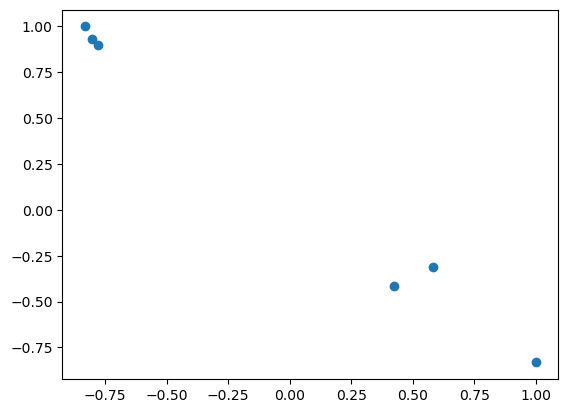

In [571]:
plt.scatter(corrDF['mpg'], corrDF['weight'])

In [572]:
def scatterplot(sr1, sr2):
    '''
    parameters: (파라미터가 무엇인지 독스트링으로 달아준다)
        sr1, sr2 : Series object
    '''
    plt.scatter(sr1, sr2)
    plt.title(f'{sr1.name} - {sr2.name} [{round(corrDF[sr1.name][sr1.name],2)}]')
    plt.xlabel(sr1.name)
    plt.ylabel(sr2.name)
    plt.show()

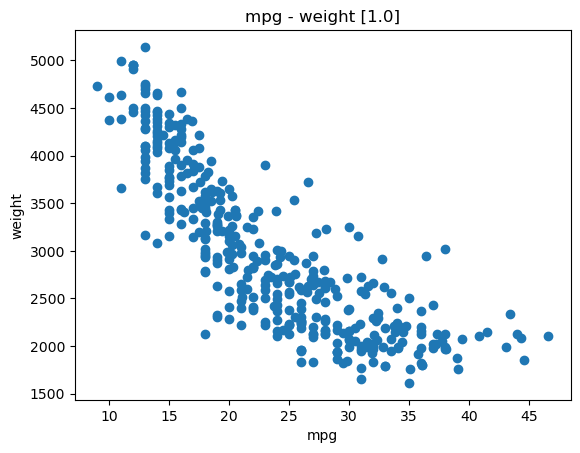

In [573]:
scatterplot(mpgDF['mpg'], mpgDF['weight'])

--------------------------

In [574]:
#def printScatter(col1, col2):
    
######d여기서부터는 추후에 강의록보고 보충 가보자고 ;;;; 

In [575]:
def printscatter(col1, col2):
    '''
    parameters:
    xol1, xol2 : column name 
    sr1, sr2 :Seiries object
    '''
    plt.scatter(mpgDF[col1], mpgDF[col2])
    plt.xlabel('col1')
    plt.ylabel('col2')
    plt.title(f'[{col1}-{col2}]')
    plt.show()

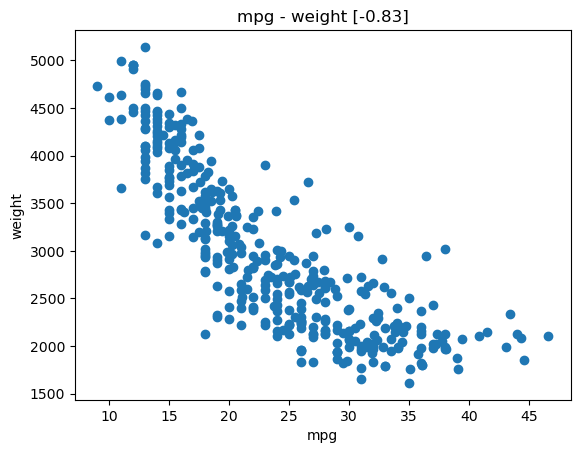

In [576]:
# 원래는 이르케 해서 이 전과정을 반복해야하는데 함수로 만들어놓으면 대괄호 안만 바뀌면 되니까 ㅇㅇ
plt.scatter(mpgDF['mpg'], mpgDF['weight'])
plt.title(f"mpg - weight [{round(corrDF['mpg']['weight'],2)}]")
plt.xlabel('mpg')
plt.ylabel('weight')
plt.show()

- (6-2) 자동차 제조사의 데이터 비율

In [577]:
originSR = mpgDF['origin'].value_counts()
originSR.index, originSR.values

(CategoricalIndex(['USA', 'JPN', 'EU'], categories=['EU', 'JPN', 'USA'], ordered=False, dtype='category', name='origin'),
 array([245,  79,  68], dtype=int64))

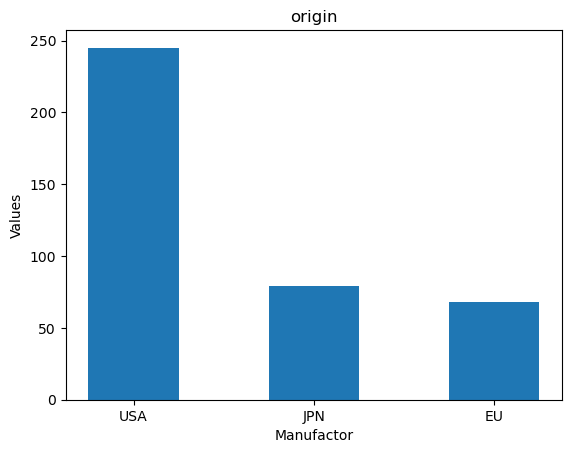

In [578]:
plt.bar(originSR.index, originSR.values, width = 0.5)     #만약 horizontal이면 height로 해야 두께 변화 가능
plt.title('origin')
plt.xlabel('Manufactor')
plt.ylabel('Values')
plt.show()

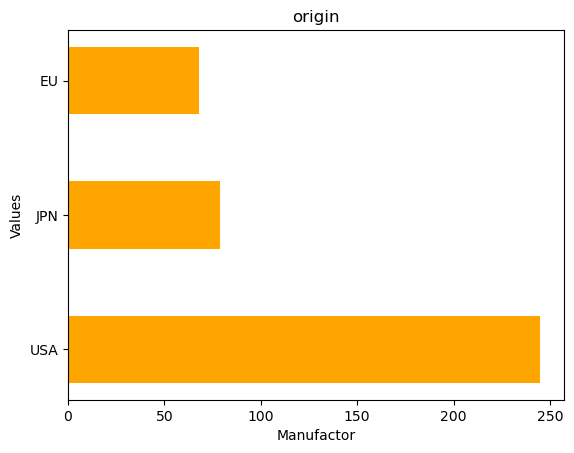

In [579]:
plt.barh(originSR.index, originSR.values, height = 0.5, color = 'orange')     #만약 horizontal이면 height로 해야 두께 변화 가능
plt.title('origin')
plt.xlabel('Manufactor')
plt.ylabel('Values')
plt.show()

- 다중 그래프

- 방법1) fig. ax = plt.subplots()
- 방법2) plt.subplot(행,열,인), plt.subplot(3,1,1), plt.subplot(3,1,2), plt.subplot(3,1,2)

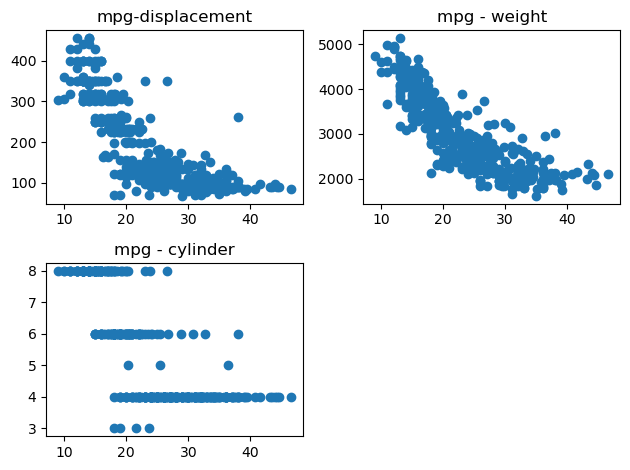

In [580]:
#plt.figure(figsize = (13, 10))

plt.subplot(2,2,1)
plt.scatter(mpgDF['mpg'], mpgDF['displacement'])
plt.title('mpg-displacement')

plt.subplot(2,2,2)
plt.scatter(mpgDF['mpg'], mpgDF['weight'])
plt.title('mpg - weight')

plt.subplot(2,2,3)
plt.scatter(mpgDF['mpg'], mpgDF['cylinder'])
plt.title('mpg - cylinder')

plt.tight_layout()      #여러개의 그래프가 겹치지 않게 최소한의 여백 지저해주는 함수
plt.show()

파라미터 하나하나 다 알필요없지만, 각 그래프 종류별 함수는 알고있어야 한다. 아 이거 보면 이거는 바 형태의 그래프이구나 이정도

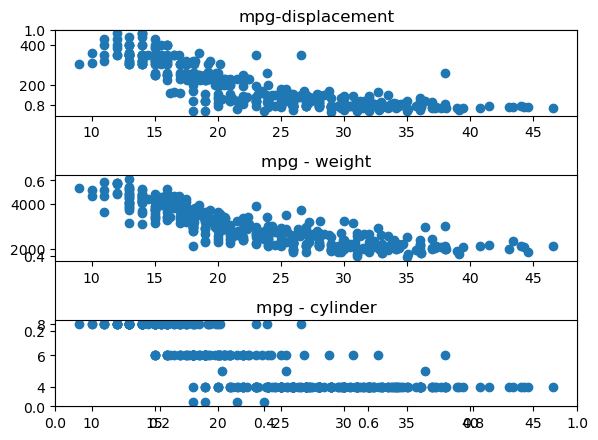

In [581]:
fig, ax = plt.subplots()

ax1 = fig.add_subplot(311) #3행 1열의 1번째
plt.scatter(mpgDF['mpg'], mpgDF['displacement'])
plt.title('mpg-displacement')

ax1 = fig.add_subplot(312)
plt.scatter(mpgDF['mpg'], mpgDF['weight'])
plt.title('mpg - weight')

ax1 = fig.add_subplot(313)
plt.scatter(mpgDF['mpg'], mpgDF['cylinder'])
plt.title('mpg - cylinder')

plt.tight_layout()      
plt.show()

Text(0.5, 1.0, 'Simple plot')

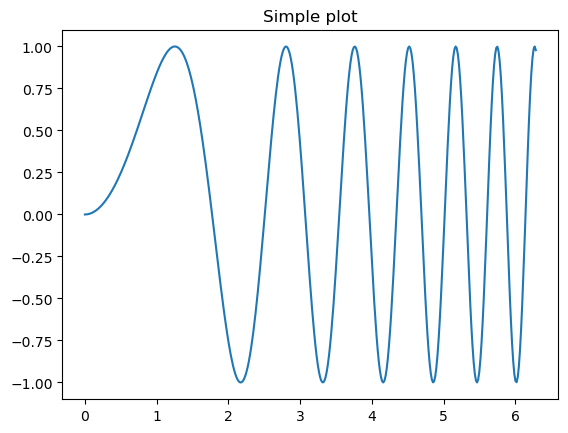

In [582]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

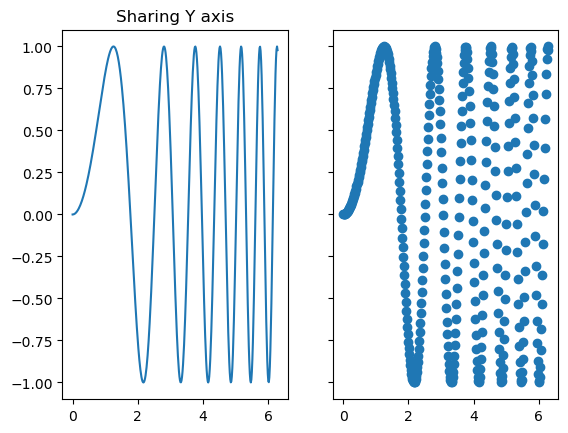

In [583]:
# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)      #y축은 공유된, 그래프 2개는 언패킹함
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

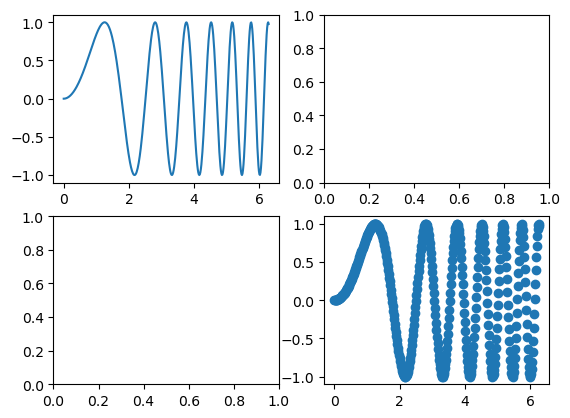

In [584]:
# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2)     #위와 같은건데 패킹된 형태
axs[0, 0].plot(x, y)              #선그래프
axs[1, 1].scatter(x, y)           #산포도

(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

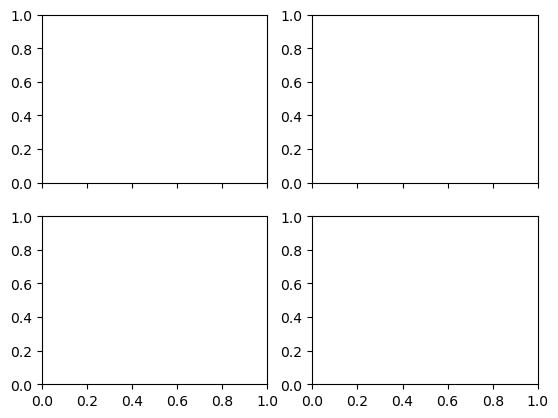

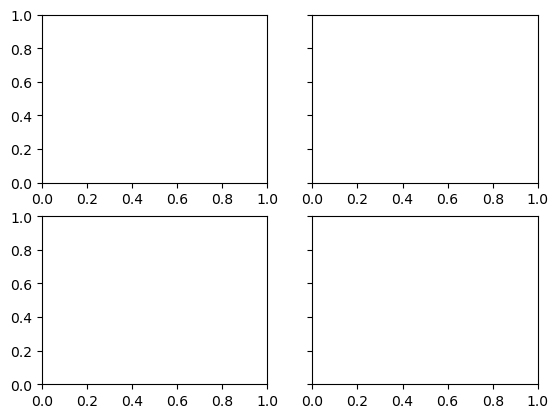

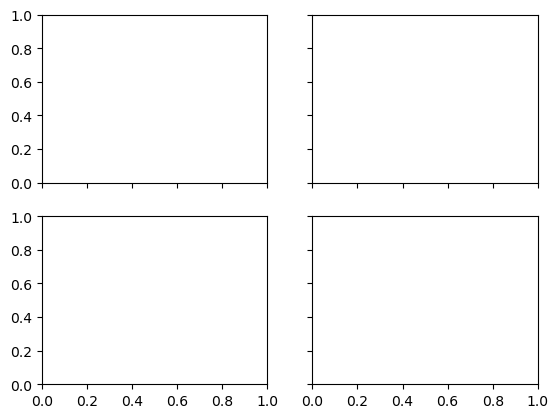

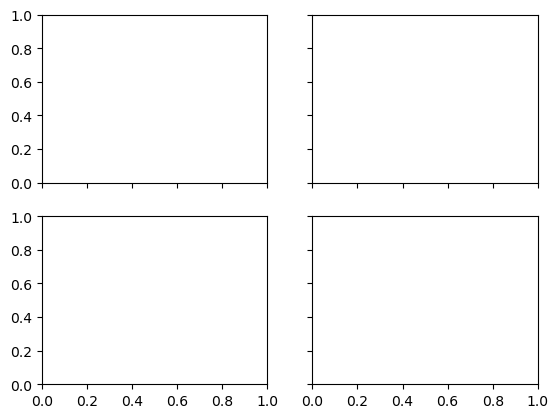

In [586]:
# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')                     #x축 공유

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')                     #y축 공유

# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')       #x,y축 공유

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)         #x,y축 공유

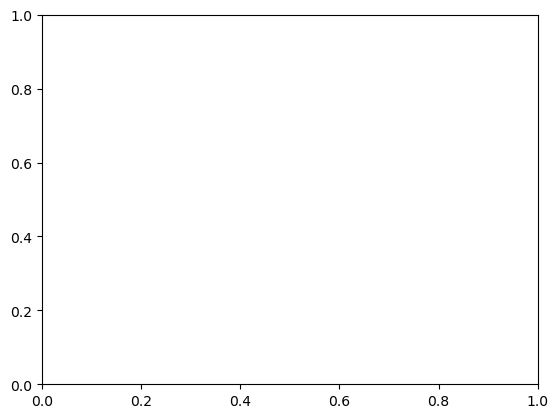

In [587]:

# Create figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax = plt.subplots(num=10, clear=True)